# LGM (Data Science) VIP

# Task 1- Iris Flowers Classification ML Project

Author: Komal Tharkar

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df= sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Pre-processing Dataset

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Correlation Matrix

In [6]:
corr=df.corr()

<AxesSubplot:>

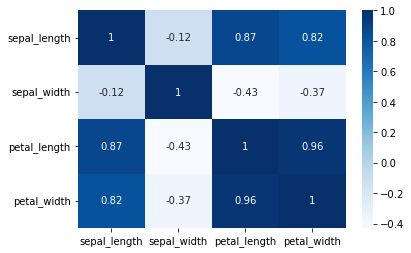

In [7]:
sns.heatmap(corr, annot=True, cmap='Blues')

## Label Encoding

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
species=df['species']
le.fit(species)
df['species']=le.transform(species)

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Training-Testing Dataset Separation

In [10]:
x=df.iloc[:,0:-1]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)
y_predict= model.predict(x_test)
y_predict

array([0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 1])

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9333333333333333


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_predict,y_test)

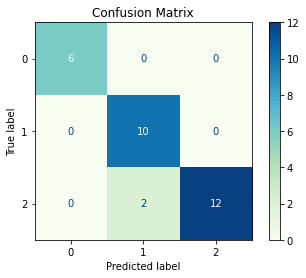

In [16]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(model, x_test, y_test,cmap=plt.cm.GnBu)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.metrics import classification_report
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      0.83      0.91        12\n           2       0.86      1.00      0.92        12\n\n    accuracy                           0.93        30\n   macro avg       0.95      0.94      0.94        30\nweighted avg       0.94      0.93      0.93        30\n'

## KNN Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(8)
knn.fit(x_train,y_train)
y_predict= knn.predict(x_test)
y_predict

array([0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 1])

In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict,y_test)

array([[ 6,  0,  0],
       [ 0, 10,  3],
       [ 0,  0, 11]], dtype=int64)

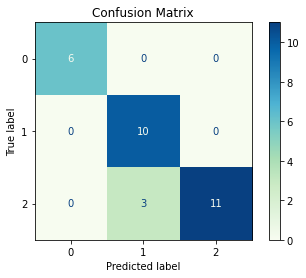

In [21]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(knn, x_test, y_test,cmap=plt.cm.GnBu)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

In [22]:
from sklearn.metrics import classification_report
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      0.77      0.87        13\n           2       0.79      1.00      0.88        11\n\n    accuracy                           0.90        30\n   macro avg       0.93      0.92      0.92        30\nweighted avg       0.92      0.90      0.90        30\n'

## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_predict=DT.predict(x_test)
y_predict

array([0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 1])

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9


In [25]:
confusion_matrix(y_predict,y_test)

array([[ 6,  0,  0],
       [ 0, 10,  3],
       [ 0,  0, 11]], dtype=int64)

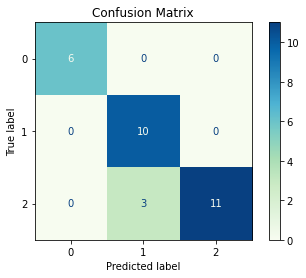

In [26]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(DT, x_test, y_test,cmap=plt.cm.GnBu)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

In [27]:
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      0.77      0.87        13\n           2       0.79      1.00      0.88        11\n\n    accuracy                           0.90        30\n   macro avg       0.93      0.92      0.92        30\nweighted avg       0.92      0.90      0.90        30\n'

## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(15)
RFC.fit(x_train,y_train)
y_predict=RFC.predict(x_test)
y_predict


array([0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 2, 2, 2])

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy:',accuracy_score(y_predict,y_test))

Accuracy: 0.9666666666666667


In [30]:
confusion_matrix(y_predict, y_test)

array([[ 6,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]], dtype=int64)

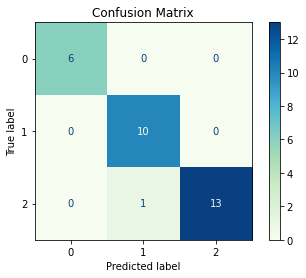

In [31]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(RFC, x_test, y_test,cmap=plt.cm.GnBu)
matrix.ax_.set_title('Confusion Matrix')
plt.show()

In [32]:
classification_report(y_predict,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      0.91      0.95        11\n           2       0.93      1.00      0.96        13\n\n    accuracy                           0.97        30\n   macro avg       0.98      0.97      0.97        30\nweighted avg       0.97      0.97      0.97        30\n'

In [33]:
RFC.score(x_test,y_test)

0.9666666666666667